In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mp
%matplotlib inline 
# ensure that graphs get displayed automatically

In [3]:
stores = pd.read_csv("E:/DSP_Classes/DataSets/stores.csv")

In [4]:
import seaborn as sb

In [5]:
stores.TotalSales

0     160.0
1     160.0
2     108.0
3     258.0
4     360.0
5     225.0
6     360.0
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14    472.0
15    460.0
16    440.0
17     78.7
18     75.7
19     71.1
20    120.1
21    318.0
22    304.0
23    350.0
24    400.0
25     79.0
26    120.3
27     95.1
28    351.0
29    145.0
30    301.0
31    121.0
Name: TotalSales, dtype: float64

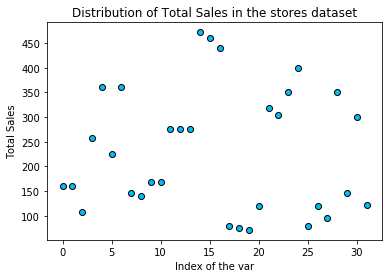

In [6]:
# Scatter plot
TS = stores.TotalSales
plt.scatter(x = range(0,32),y = TS,color = "deepskyblue",edgecolors="black",alpha=1)
plt.xlabel("Index of the var")
plt.ylabel("Total Sales")
plt.title("Distribution of Total Sales in the stores dataset")
plt.show()
# http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

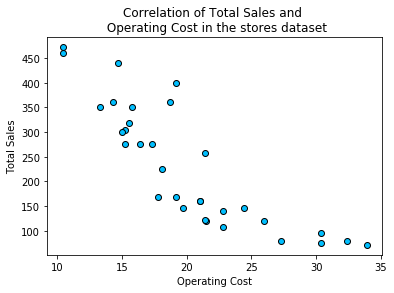

In [7]:
OC = stores.OperatingCost
plt.scatter(x = OC,y = TS,color = "deepskyblue",edgecolors="black",alpha=1)
plt.xlabel("Operating Cost")
plt.ylabel("Total Sales")
plt.title("Correlation of Total Sales and \n Operating Cost in the stores dataset")
plt.show()

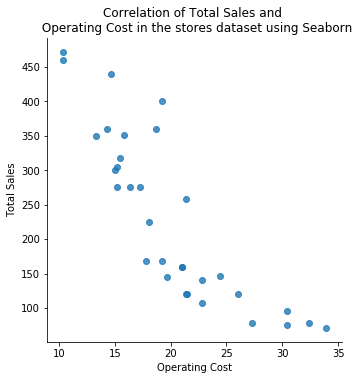

In [8]:
sb.lmplot(x="OperatingCost",y="TotalSales",data = stores,fit_reg=False)
plt.xlabel("Operating Cost")
plt.ylabel("Total Sales")
plt.title("Correlation of Total Sales and \n Operating Cost in the stores dataset using Seaborn")
plt.show()


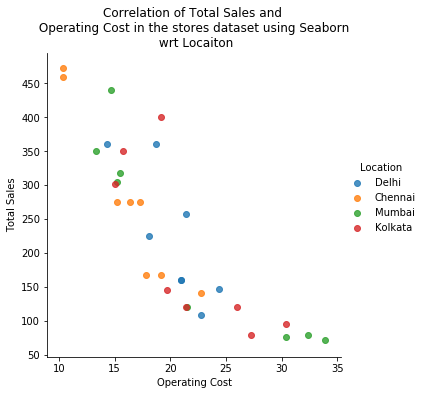

In [9]:
sb.lmplot(x="OperatingCost",y="TotalSales",data = stores,fit_reg=False,hue="Location")
plt.xlabel("Operating Cost")
plt.ylabel("Total Sales")
plt.title("Correlation of Total Sales and \n Operating Cost in the stores dataset using Seaborn \n wrt Locaiton")
plt.show()

# Task : 
# Assign a custom color pallette to the graph

In [10]:
color_names = list(mp.colors.cnames.keys())
color_names

n = len(stores.Location.unique())

random_color_ix = list(np.random.randint(148,size=4))

selected_colors = []
for i in random_color_ix:
    selected_colors.append(color_names[i])
selected_colors = np.array(selected_colors,dtype='object') 
selected_colors

array(['mediumblue', 'deeppink', 'peru', 'teal'], dtype=object)

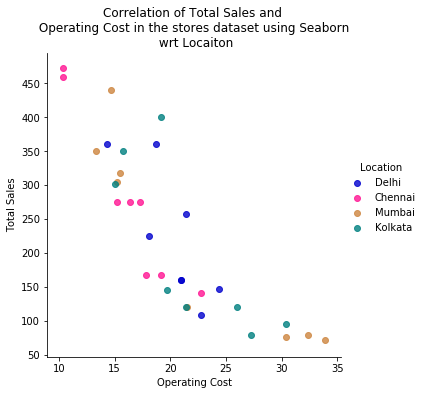

In [11]:
sb.lmplot(x="OperatingCost",
          y="TotalSales",
          data = stores,
          fit_reg=False,
          hue="Location",
          palette=selected_colors)
plt.xlabel("Operating Cost")
plt.ylabel("Total Sales")
plt.title("Correlation of Total Sales and \n Operating Cost in the stores dataset using Seaborn \n wrt Locaiton")
plt.show()

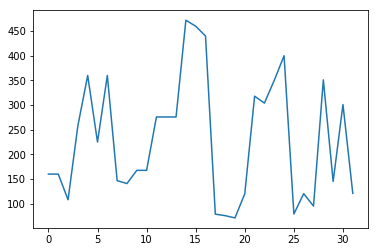

In [12]:
# Pandas
stores.TotalSales.plot()

In [ ]:
stores.TotalSales.plot(kind="hist",bins = 5,edgecolor = "black")

In [ ]:
stores.OperatingCost.plot(kind = "box")

In [ ]:
stores.plot(x = "OperatingCost", y = "TotalSales",kind="scatter",color = "r")
# Task : change the ranges of x and y axes
# for that we use xlim and ylim
plt.xlim(10,50)
plt.ylim(0,600)
# Task : How to set custom increments?
(np.arange(0,100,2.5))

In [ ]:
# Bar Chart

In [13]:
# Frequency Bar
# Freq table of StoreType

Res = stores.groupby(["StoreType"])[["StoreType"]].count().add_prefix("Count_")

In [14]:
Res

,Count_StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


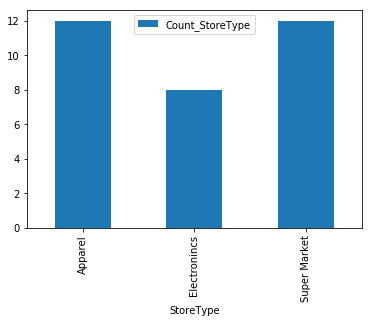

In [15]:
Res.plot(kind="bar")

In [16]:
# Sum of total sales wrt Location
Res2 = stores.groupby(["Location"])[["TotalSales"]].sum().add_prefix("SumOf_")
Res2

,SumOf_TotalSales
Location,
Chennai,2235.4
Delhi,1777.7
Kolkata,1612.4
Mumbai,1757.6


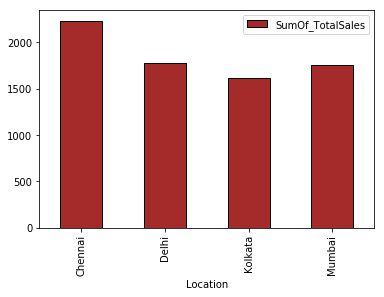

In [17]:
Res2.plot(kind="bar",color = "brown",edgecolor = "black")

In [18]:
# Sum TS wrt Location and StoreType
Res3 = stores.groupby(["Location","StoreType"])[["TotalSales"]].sum().add_prefix("SumOf_")
Res3

SumOf_TotalSales
Location StoreType                     
Chennai  Apparel                  915.4
         Electronincs             600.8
         Super Market             719.2
Delhi    Apparel                  745.0
         Electronincs             306.7
         Super Market             726.0
Kolkata  Apparel                  525.0
         Electronincs             521.0
         Super Market             566.4
Mumbai   Apparel                  700.7
         Electronincs             790.0
         Super Market             266.9

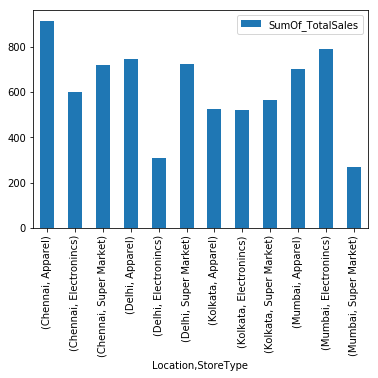

In [19]:
Res3.plot(kind="bar")

In [24]:
Res3.reset_index().pivot(["Location"],"StoreType","SumOf_TotalSales")

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,915.4,600.8,719.2
Delhi,745.0,306.7,726.0
Kolkata,525.0,521.0,566.4
Mumbai,700.7,790.0,266.9


---

In [20]:
Res3_wide = Res3.reset_index().pivot("Location","StoreType","SumOf_TotalSales")

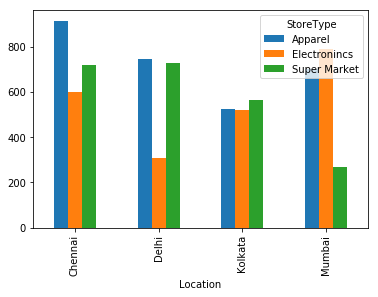

In [27]:
Res3_wide.plot(kind="bar") # for dodged
Res3_wide.plot(kind="bar",stacked = True) # for stacked
plt.show()

In [43]:
a,b = 10,20

In [ ]:
# Task : 
# Add text/numeirc labels over/above the bars

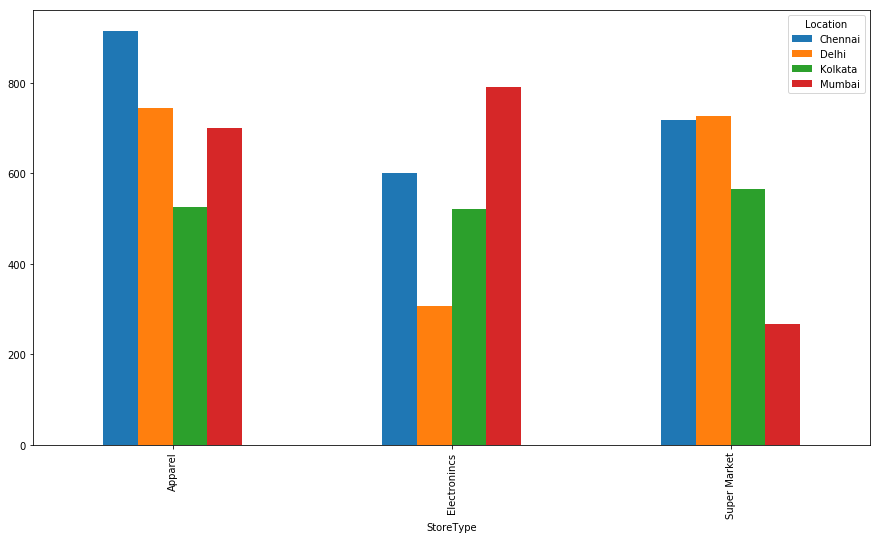

In [45]:
fig,ax = plt.subplots(1, 1, figsize=(15,8))
Res3.reset_index().pivot("StoreType","Location","SumOf_TotalSales").plot(kind="bar",ax=ax)
# ax is an arg that takes fig properties as input
plt.show()

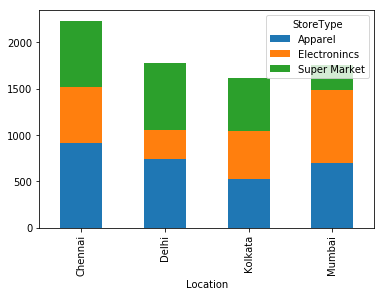

In [30]:
Res3.reset_index().pivot("Location","StoreType","SumOf_TotalSales").plot(kind="bar",stacked = True)

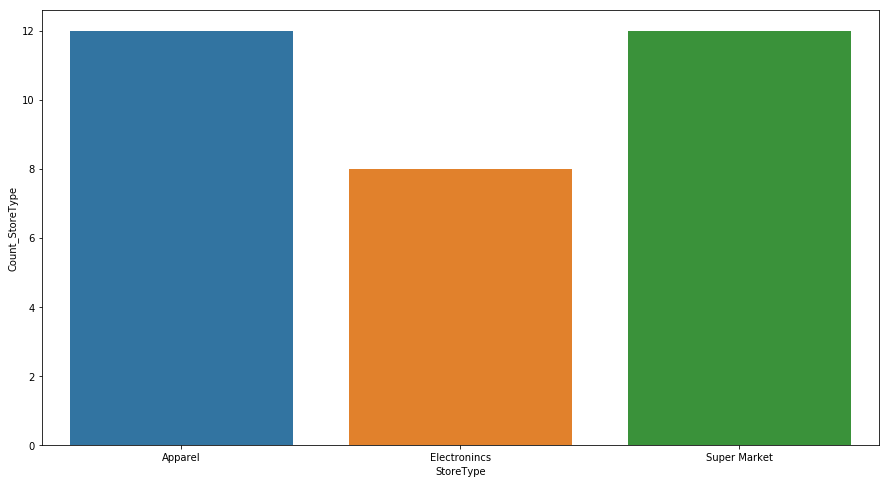

In [31]:
Res_t = Res.reset_index()
Res_t
fig,ax = plt.subplots(1, 1, figsize=(15,8))
sb.barplot(x = "StoreType",y = "Count_StoreType",data=Res_t,ax=ax)
plt.show()

In [32]:
Res3_t = Res3.reset_index()
Res3_t

,Location,StoreType,SumOf_TotalSales
0,Chennai,Apparel,915.4
1,Chennai,Electronincs,600.8
2,Chennai,Super Market,719.2
3,Delhi,Apparel,745.0
4,Delhi,Electronincs,306.7
5,Delhi,Super Market,726.0
6,Kolkata,Apparel,525.0
7,Kolkata,Electronincs,521.0
8,Kolkata,Super Market,566.4
9,Mumbai,Apparel,700.7


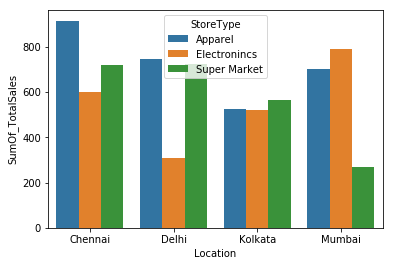

In [47]:
#sb.lmplot(x,y,data,hue)
sb.barplot(x="Location",y="SumOf_TotalSales",data=Res3_t,hue = "StoreType") # dodged bar
# Default args : 
# in pandas DF.plot(stacked = False)
# in sb.barplot(dodge = True)

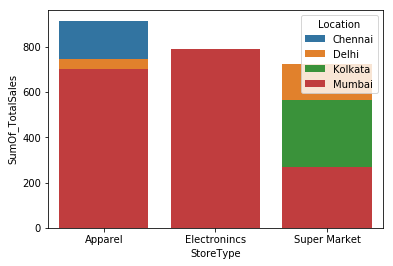

In [34]:
sb.barplot(x="StoreType",y="SumOf_TotalSales",
           data=Res3_t,hue = "Location",
           dodge=False
          )

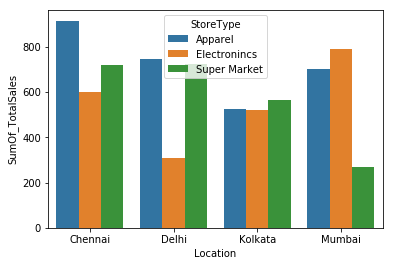

In [41]:
Res3_t
sb.barplot(data=Res3_t,x = "Location",y = "SumOf_TotalSales",hue = "StoreType")

C:\Users\sunitprasad\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


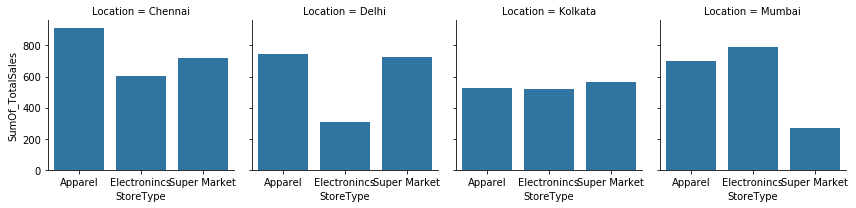

In [49]:
fig = sb.FacetGrid(Res3_t, col = "Location")
fig.map(sb.barplot,"StoreType","SumOf_TotalSales")

---

In [ ]:
Res

In [ ]:
# Pie
Res.plot(kind = "pie",subplots=True)

In [ ]:
Res_t = Res.reset_index()

plt.pie(data=Res_t,x = "Count_StoreType",labels="StoreType",autopct="%.2f%%")
plt.show()




In [ ]:
Res3_t

In [ ]:
# Using Matplotlib
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(x = "SumOf_TotalSales", labels="Location", colors=colors,
        autopct='%.2f%%', shadow=True, startangle=140,data = Res3_t)
 
plt.axis('equal')
plt.show()

# Task : 
# Represent the above data into three pie charts, corresponding to 3 levels of StoreType


https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

---

In [ ]:
# Histograms

In [ ]:
import numpy as np

In [ ]:
NormalData = np.random.normal(loc=120,scale=10,size=10000) # mean, sd, size
NormalData = pd.Series(NormalData)

In [ ]:
plt.hist(NormalData,bins=70,color="deepskyblue")
plt.show()

In [ ]:
# 68% values between mean +/- 1 SD
m = NormalData.mean()
sd = NormalData.std()

LC = m - sd
UC = m + sd

In [ ]:
len(NormalData.loc[(NormalData > LC) & (NormalData < UC)])/len(NormalData) * 100

In [ ]:
LC = m - 3*sd
UC = m + 3*sd
len(NormalData.loc[(NormalData > LC) & (NormalData < UC)])/len(NormalData) * 100

In [ ]:
NormalData.hist(bins = 70)

In [ ]:
NormalData2 = NormalData.copy(deep=True)

In [ ]:
Z_data = (NormalData - NormalData.mean())/NormalData.std()

In [ ]:
plt.hist(NormalData,bins = 70)
plt.show()

In [ ]:
plt.hist(Z_data,bins = 70)
plt.show()

In [1]:
import pandas as pd
import os

In [4]:
os.chdir('F:/TechM_Python/Day 4')

In [5]:
pd.read_pickle("some_random_series")

0     12
1     34
2     56
3     78
4     90
5     34
6      5
7      6
8      7
9      3
10     2
dtype: int64

In [6]:
import pickle

In [ ]:
7 & 8